Observe the sigmoid on [-7, 7]

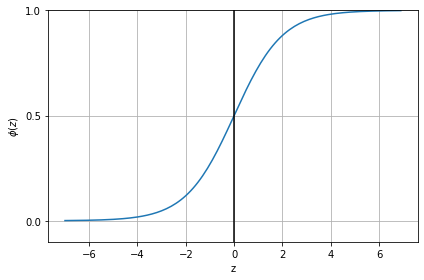

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.ylim(-0.1, 1)
plt.yticks([0.0, 0.5, 1.0])
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
z = np.linspace(10,-10,100)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c1,label='J(w) if y = 1', linestyle='--',color='b')
plt.plot(phi_z, c0, label='J(w) if y = 0', linestyle='-.',color='r')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi(z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

NameError: name 'cost_1' is not defined

# Logistic Regression

In [5]:
class LogisticRegressionSGD(object):
    """  hyperparams:
    
    eta:float-learning rate
    n_iter:int iterations through data set
    
    shuffle:bool -shuffles training data
    
    random_state : int initial state for the generator of random numbers
    
    attributes:
    
    w_ - vector of weights
    
   cost_ -vector of errors /incorrect classifications"""
    
    
    
    def __init__(self, eta=0.05, n_iter=100, random_state = 1 ):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
      
            
            
    def fit(self, X, y):
        "fits training data"
        
        """
        X - matrix of features and training samples shape =[n_examples, n_features]
        
        y - column vector of target values shape =[n_examples,1]
        
        returns self: object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 +X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y @ np.log(output))-((1 - y) @ np.log(1 - output))
            self.cost_.append(cost)    
        
        return self 
    
    def net_input(self, X):
        "Compute net input"
        return X @ self.w_[1:] + self.w_[0]
    
    def activation(self, X):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        "return a label after each iteration"
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        #return np.where(self.activation(self.net_input(X)) >= 0.5, 1, -1) # the same
    
    

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution = 0.02):
    markers = ('s', 'x', 'o', '4', '4')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # show the decision region
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # display by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl, 0],
                    y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label =cl)
        
    if test_idx:
        X_ts, y_ts = X[test_idx,:], y[test_idx]
        plt.scatter( X_ts[:,0],  X_ts[:,1],c='w',
                   edgecolor='k', alpha=1.0,linewidth=1, marker='o',
                   s=100, label='Test set')

In [7]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Labels: ',np.unique(y))


Labels:  [0 1 2]


In [8]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3,
                                          random_state=1, stratify=y)


Let's check if it works for classes 0  and 1


In [9]:
X_tr01_subset = X_tr[(y_tr==0) | (y_tr == 1)]
y_tr01_subset = y_tr[(y_tr==0) | (y_tr == 1)]

lrgd = LogisticRegressionSGD(eta =0.05, n_iter=1000, random_state=1)


In [10]:
len(y_tr01_subset)
len(X_tr01_subset)

70

In [11]:
lrgd.fit(X_tr01_subset, y_tr01_subset)



ValueError: operands could not be broadcast together with shapes (70,) (100,) 

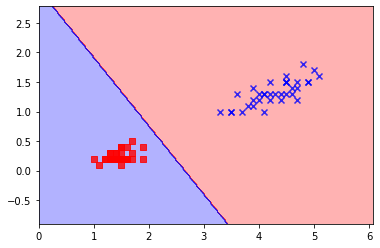

In [12]:
plot_decision_regions(X_tr01_subset, y_tr01_subset,lrgd)

# Scikit Realization

In [13]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.preprocessing import StandardScaler

# standardize
sc = StandardScaler()
sc.fit(X_tr)
X_st_tr = sc.transform(X_tr)
X_st_ts = sc.transform(X_ts)

# logistic regression
lr = LR(C=100, random_state=1,
       solver='lbfgs', multi_class='ovr' )
lr.fit(X_st_tr , y_tr)


LogisticRegression(C=100, multi_class='ovr', random_state=1)

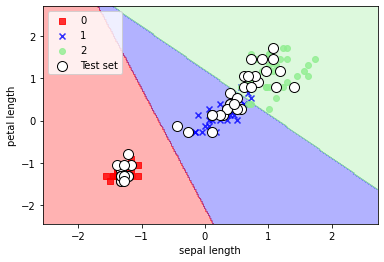

In [14]:
from plot_decision import plot_decision_regions
import numpy as np
X_comb_std = np.vstack((X_st_tr, X_st_ts))
y_comb_std = np.hstack((y_tr, y_ts))
plot_decision_regions(X=X_comb_std, y=y_comb_std,
                      classifier=lr, test_idx=range(105,150))
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

Check probabilities. Yield probabilities of each class(by line) for 3 samples 

In [15]:
lr.predict_proba(X_st_ts[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

 First sample belongs to class 2 with 85%
 2nd sample belongs to class 0
 etc...

In [16]:
lr.predict_proba(X_st_ts[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

equals

In [17]:
lr.predict(X_st_ts[:3,:])

array([2, 0, 0])

For single sample. It needs to be converted into 2d array

In [19]:
lr.predict(X_st_ts[0,:].reshape(1,-1))

array([2])

# Regularization


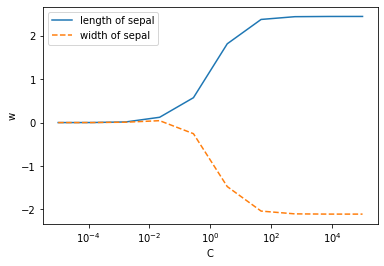

In [23]:
weights, params = [],[]
for c in np.linspace(-5,5,10):
    lr = LR(C=10**c, random_state=1,
           solver='lbfgs', multi_class='ovr')
    lr.fit(X_st_tr, y_tr)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)    
plt.plot(params, weights[:,0],
        label = 'length of sepal')
plt.plot(params, weights[:,1], linestyle='--', 
        label='width of sepal')
plt.ylabel("w")
plt.xlabel("C")
plt.legend(loc='best')
plt.xscale('log')
plt.show()